<a href="https://colab.research.google.com/github/harshkrr/SkillCraft1-Master-Table-Dataset/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving SkillCraft1_Dataset.csv to SkillCraft1_Dataset.csv


In [8]:
import io
import pandas as pd
df = pd.read_csv(io.BytesIO(uploaded['SkillCraft1_Dataset.csv']))

In [11]:
df.shape

(3395, 20)

In [42]:
df.head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.0,0.000000
1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001194,5,0.0,0.000208
2,56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.0,0.000189
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.0,0.000384
4,58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.0,0.000019


In [13]:
df.dtypes

GameID                    int64
LeagueIndex               int64
Age                      object
HoursPerWeek             object
TotalHours               object
APM                     float64
SelectByHotkeys         float64
AssignToHotkeys         float64
UniqueHotkeys             int64
MinimapAttacks          float64
MinimapRightClicks      float64
NumberOfPACs            float64
GapBetweenPACs          float64
ActionLatency           float64
ActionsInPAC            float64
TotalMapExplored          int64
WorkersMade             float64
UniqueUnitsMade           int64
ComplexUnitsMade        float64
ComplexAbilitiesUsed    float64
dtype: object

In [16]:
traindata  = df

Looking at the distribution of missing values in the dataset

In [44]:
missingCounts = []
missingPercent = []
totalvalues=traindata.shape[0]

for col in traindata:
  temp = (traindata[col]=='?').sum()
  missingCounts.append(temp)
  missingPercent.append(temp/totalvalues*100)

missingInfo = pd.DataFrame({"Attribute Name":traindata.columns,"Missing Count": missingCounts, "Missing Percent": missingPercent})
#looking at the attributes with missing values
missingInfo[missingInfo["Missing Count"]!=0].reset_index(drop=True).sort_values("Missing Count", ascending=False)

,Attribute Name,Missing Count,Missing Percent
2,TotalHours,57,1.678940
1,HoursPerWeek,56,1.649485
0,Age,55,1.620029


In [46]:
missing_cols = ["TotalHours","HoursPerWeek","Age"]

finding the skweness of columns

In [45]:
skewness = []
# stats = []
for col in traindata.columns:
    skewness.append((col,traindata[col].nunique(),traindata[col].value_counts(normalize=True).values[0] * 100, traindata[col].dtype))
    # stats.append((col, train[col].nunique(), train[col].isnull().sum() * 100 / train.shape[0], train[col].value_counts(normalize=True, dropna=False).values[0] * 100, train[col].dtype))
    
skewness = pd.DataFrame(skewness, columns=['Attribute Name', '# of Unique values', '% in the biggest category', 'type'])
skewness.sort_values('% in the biggest category', ascending=False).reset_index()[0:30]

,index,Attribute Name,# of Unique values,% in the biggest category,type
0,18,ComplexUnitsMade,1110,67.187040,float64
1,19,ComplexAbilitiesUsed,1828,45.714286,float64
2,9,MinimapAttacks,2471,25.832106,float64
3,1,LeagueIndex,8,23.888071,int64
4,17,UniqueUnitsMade,12,22.621502,int64
5,8,UniqueHotkeys,11,18.173785,int64
6,3,HoursPerWeek,33,12.106038,object
7,2,Age,29,10.515464,object
8,4,TotalHours,238,9.661267,object
9,15,TotalMapExplored,52,5.714286,int64


filling the missing values

In [74]:
for col in missing_cols:
  sum = 0
  for s in traindata[col]:
    if s!='?':
      sum = sum + float(s)
  mean1 = sum/len(traindata[col])
  traindata[col].replace({"?" : str(mean1)}, inplace=True)

In [75]:
missingCounts = []
missingPercent = []
totalvalues=traindata.shape[0]

for col in traindata:
  temp = (traindata[col]=='?').sum()
  missingCounts.append(temp)
  missingPercent.append(temp/totalvalues*100)

missingInfo = pd.DataFrame({"Attribute Name":traindata.columns,"Missing Count": missingCounts, "Missing Percent": missingPercent})
#looking at the attributes with missing values
missingInfo[missingInfo["Missing Count"]!=0].reset_index(drop=True).sort_values("Missing Count", ascending=False)

,Attribute Name,Missing Count,Missing Percent


Correlation heat map

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

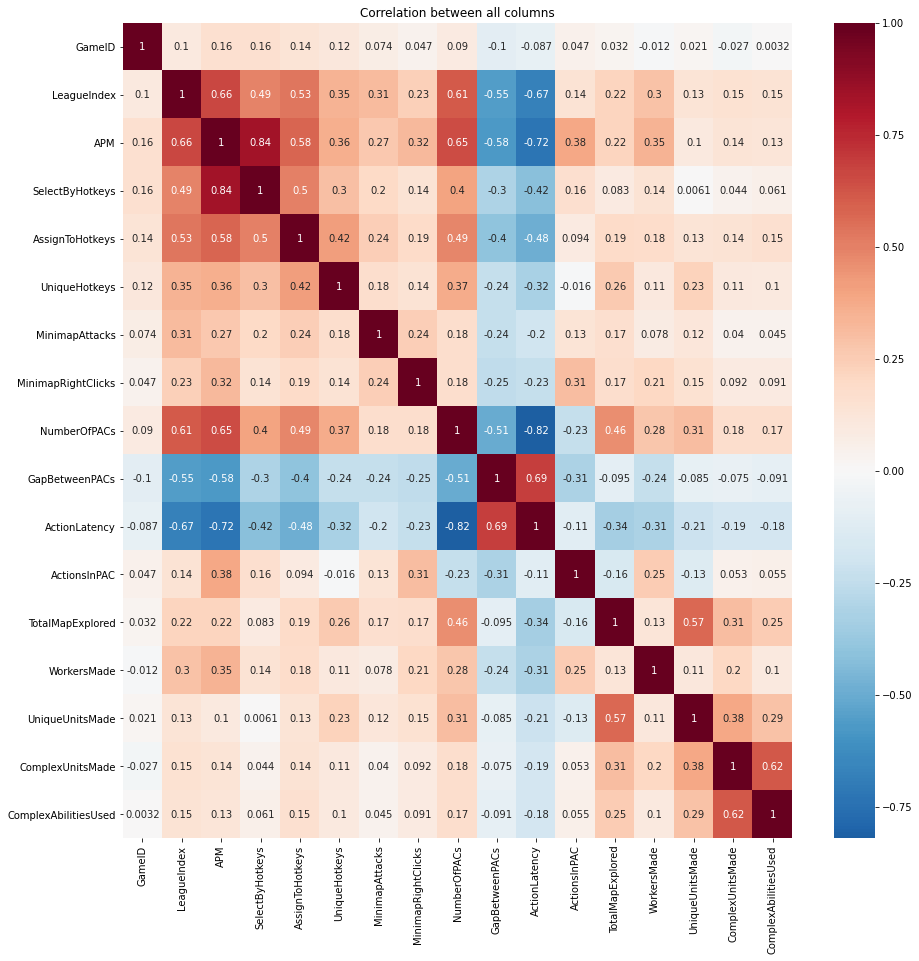

In [81]:
plt.figure(figsize=(15,15))
sns.heatmap(traindata.corr(),cmap='RdBu_r',annot=True,center=0)
plt.title('Correlation between all columns')
plt.show()